#7. The convolution theorem#

Lets create an example of the convolution theorem.

First import the necessary modules:

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pylab as plt

Make our convenience functions using the fourier transform provided by numpy (don't worry about the details of this now!):

In [2]:
def ft(y):
    """Returns the fourier transform of y"""
    return np.fft.fftshift(np.fft.fft(np.fft.fftshift(y)))

def ift(y):
    """Returns the inverse fourier transform of y"""
    return np.fft.fftshift(np.fft.ifft(np.fft.fftshift(y)))

def ftfreqs(N,dt):
    """Returns the Fourier frequencies"""
    return np.fft.fftshift(np.fft.fftfreq(N,dt))

Lets define some of the frequently used functions again, so we can play with them:

In [3]:
# constant function of amplitude A
def constant(t,A):
    return A*np.ones(len(t))

In [4]:
# spike of amplitude A at given value of t
def spike(t,t0,A):
    output = np.zeros(len(t))
    output[t==t0] = A
    print sum(t==t0)
    return output

In [5]:
# top-hat function
def tophat(t,width,A):
    output = np.zeros(len(t))
    output[abs(t)<width/2.0] = A
    return output

In [6]:
# sinc function
def sincfunc(t,scale):
    return np.sinc(t/scale)

In [7]:
# gaussian function
def gaussian(t,sigma):
    return (1./(np.sqrt(2.*np.pi)*sigma))*np.exp(-t**2.0/(2.0*sigma**2.0))

In [8]:
# comb function
def comb(t,t_space,A):
    output = np.zeros(len(t))
    mod_array = np.array([round(i,2)%t_space for i in t])
    output[mod_array==0] = A
    return output

##The convolution theorem##

Remember the convolution theorem:
<br/>
<br/>
$$ h * g \;\; \Leftrightarrow \;\; H \; . \; G $$
<br/>
or, equivalently:
<br/>
<br/>
$$ H * G \;\; \Leftrightarrow \;\; h \; . \; g $$

<br/>

For this example, lets use:

h - cosine function
<br/>
g - sinc function

Then lets:

* Fourier transforms $h(t)$ and $g(t)$ to get $H(f)$ and $G(f)$
* Convolve the Fourier transforms: $Y(f) = H(f) * G(f)$
* Take the reverse Fourier transform of $Y(f)$ to get $y(t)$
* See what we get!

In [9]:
delta_t = 0.02
t = np.arange(-1200,1200,delta_t)              # set x-axis value

freqs = ftfreqs(len(t),delta_t)                # get our Fourier transform frequency values

(-0.7, 0.7)

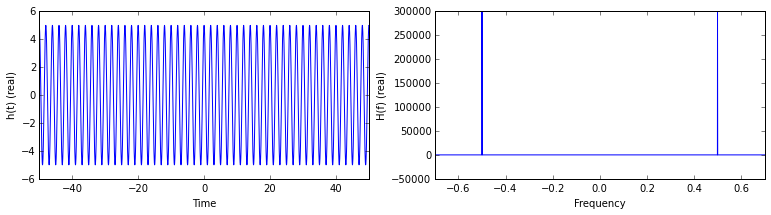

In [10]:
h = 5.0*np.cos(2.*np.pi*t*0.5)                    # create function f(t)
H = ft(h)                                      # Fourier transform

fig, ax = plt.subplots(1,2,figsize=[13,3])     # create plot

ax[0].plot(t,h.real)
ax[0].set_xlabel('Time')
ax[0].set_ylabel('h(t) (real)')

ax[1].plot(freqs,H.real)
ax[1].set_xlabel('Frequency')
ax[1].set_ylabel('H(f) (real)')

ax[0].set_xlim(-50.,50.)
ax[1].set_xlim(-0.7,0.7)

(-0.7, 0.7)

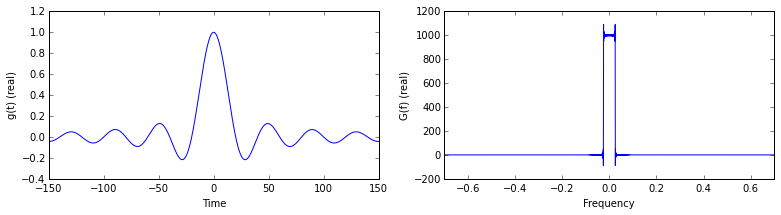

In [11]:
g = sincfunc(t,20.)                            # create function f(t)
G = ft(g)                                      # Fourier transform

fig, ax = plt.subplots(1,2,figsize=[13,3])     # create plot

ax[0].plot(t,g)
ax[0].set_xlabel('Time')
ax[0].set_ylabel('g(t) (real)')

ax[1].plot(freqs,G.real)
ax[1].set_xlabel('Frequency')
ax[1].set_ylabel('G(f) (real)')

ax[0].set_xlim(-150.,150.)
ax[1].set_xlim(-0.7,0.7)

In [12]:
# lets convolve our Fourier transformed functions, using the numpy convolve function:
Y = np.convolve(H,G,mode='same')
# then reverse Fourier transform:
y = ift(Y)

(-0.7, 0.7)

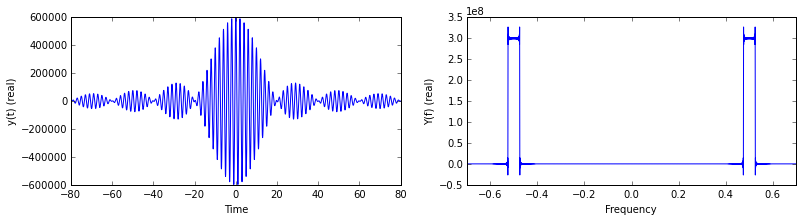

In [13]:
fig, ax = plt.subplots(1,2,figsize=[13,3])     # create plot

ax[0].plot(t,y.real)
ax[0].set_xlabel('Time')
ax[0].set_ylabel('y(t) (real)')

ax[1].plot(freqs,Y.real)
ax[1].set_xlabel('Frequency')
ax[1].set_ylabel('Y(f) (real)')

ax[0].set_xlim(-80.,80.)
ax[1].set_xlim(-0.7,0.7)

Is that what you expect?

Lets plot all the plots together, so we can think about them:

(-0.7, 0.7)

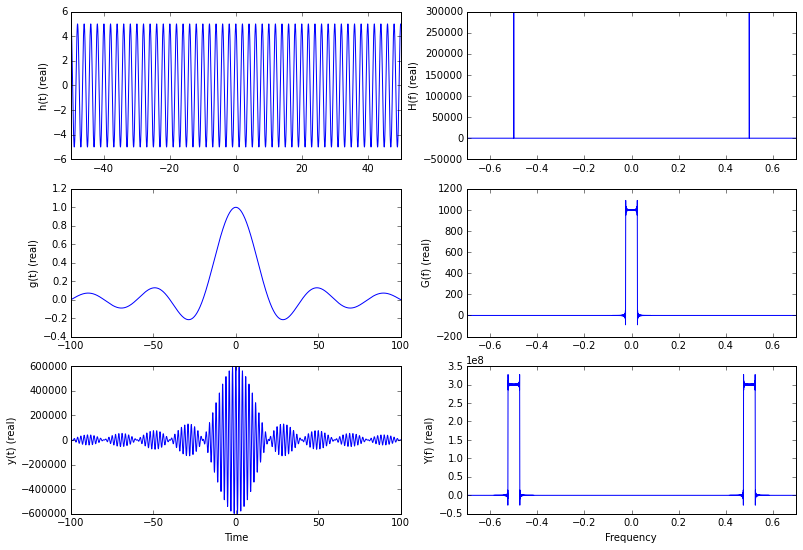

In [14]:
fig, ax = plt.subplots(3,2,figsize=[13,9]) 

# plot h and H
ax[0,0].plot(t,h)
ax[0,0].set_ylabel('h(t) (real)')

ax[0,1].plot(freqs,H.real)
ax[0,1].set_ylabel('H(f) (real)')

ax[0,0].set_xlim(-50.,50.)
ax[0,1].set_xlim(-0.7,0.7)

# plot g and G
ax[1,0].plot(t,g)
ax[1,0].set_ylabel('g(t) (real)')

ax[1,1].plot(freqs,G.real)
ax[1,1].set_ylabel('G(f) (real)')

ax[1,0].set_xlim(-100.,100.)
ax[1,1].set_xlim(-0.7,0.7)

# plot y and Y
ax[2,0].plot(t,y.real)
ax[2,0].set_xlabel('Time')
ax[2,0].set_ylabel('y(t) (real)')

ax[2,1].plot(freqs,Y.real)
ax[2,1].set_xlabel('Frequency')
ax[2,1].set_ylabel('Y(f) (real)')

ax[2,0].set_xlim(-100.,100.)
ax[2,1].set_xlim(-0.7,0.7)

Can you explain these results?

How about playing with some of the other functions we defined at the beginning... :)

###Version information###

In [15]:
import os, sys
import numpy
import matplotlib
import IPython

print 'OS:          ', os.name, sys.platform
print 'Python:      ', sys.version.split()[0]
print 'IPython:     ', IPython.__version__
print 'Numpy:       ', numpy.__version__
print 'matplotlib:  ', matplotlib.__version__

OS:           posix linux2
Python:       2.7.6
IPython:      3.2.0-dev
Numpy:        1.9.0
matplotlib:   1.4.3
